In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import MinMaxScaler
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
plt.style.use('dark_background')
import math

In [2]:
data = pd.read_csv('Real_Estate_Sales_2001-2020_GL.csv', low_memory=False)
data.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN
4,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family,NaN,NaN,NaN,NaN


In [3]:
data.tail()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
997208,190272,2019,06/24/2020,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family,14 - Foreclosure,NaN,NaN,NaN
997209,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family,25 - Other,PRIVATE SALE,NaN,NaN
997210,190129,2019,04/27/2020,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family,NaN,NaN,NaN,NaN
997211,190504,2019,06/03/2020,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family,NaN,NaN,NaN,NaN
997212,190344,2019,12/20/2019,Milford,250 RESEARCH DR,4035970.0,7450000.0,0.541700,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997211 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997162 non-null  object 
 5   Assessed Value    997213 non-null  float64
 6   Sale Amount       997213 non-null  float64
 7   Sales Ratio       997213 non-null  float64
 8   Property Type     614767 non-null  object 
 9   Residential Type  608904 non-null  object 
 10  Non Use Code      289681 non-null  object 
 11  Assessor Remarks  149864 non-null  object 
 12  OPM remarks       9934 non-null    object 
 13  Location          197697 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 106.5+ MB


In [5]:
data.shape

(997213, 14)

In [ ]:
data.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,9.972130e+05,997213.000000,9.972130e+05,9.972130e+05,9.972130e+05
mean,4.311864e+05,2010.189829,2.791437e+05,3.911512e+05,1.044637e+01
std,6.549219e+06,6.237877,1.670610e+06,5.347270e+06,1.890192e+03
min,0.000000e+00,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.044400e+04,2004.000000,8.760000e+04,1.400000e+05,4.867000e-01
50%,7.030300e+04,2010.000000,1.383900e+05,2.250000e+05,6.246000e-01
75%,1.518780e+05,2016.000000,2.255600e+05,3.650000e+05,7.852761e-01
max,2.000500e+09,2020.000000,8.815100e+08,5.000000e+09,1.226420e+06


In [7]:
data.dtypes

Serial Number         int64
List Year             int64
Date Recorded        object
Town                 object
Address              object
Assessed Value      float64
Sale Amount         float64
Sales Ratio         float64
Property Type        object
Residential Type     object
Non Use Code         object
Assessor Remarks     object
OPM remarks          object
Location             object
dtype: object

In [8]:
missing_value = data.isnull().sum()
print("Missing_value:\n", missing_value)

Missing_value:
 Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    388309
Non Use Code        707532
Assessor Remarks    847349
OPM remarks         987279
Location            799516
dtype: int64


In [9]:
duplicated_vals = data[data.duplicated]
print("dublicated: \n", duplicated_vals)

dublicated: 
 Empty DataFrame
Columns: [Serial Number, List Year, Date Recorded, Town, Address, Assessed Value, Sale Amount, Sales Ratio, Property Type, Residential Type, Non Use Code, Assessor Remarks, OPM remarks, Location]
Index: []


In [10]:
data.dropna(axis=0, inplace=True)

In [11]:
data.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
759,200594,2020,02/16/2021,Danbury,8 HICKORY ST,121600.0,146216.0,0.831646,Residential,Single Family,25 - Other,I11192,HOUSE HAS SETTLED PER MLS,POINT (-73.44696 41.41179)
933,200562,2020,02/03/2021,Danbury,19 MILL RD,263600.0,415000.0,0.635181,Residential,Single Family,25 - Other,AFFORDABLE HOUSING / B15001-20-19,INCORRECT DATA PER TOWN RECORDS,POINT (-73.53692 41.38822)
1470,200260,2020,11/23/2020,Danbury,32 COALPIT HILL RD #4,84900.0,181778.0,0.467053,Residential,Condo,25 - Other,J16087-4,MULTIPLE UNIT SALE,POINT (-73.43796 41.38549)
2107,200148,2020,01/05/2021,Avon,23 CHEPACHET ROAD,165260.0,430000.0,0.384326,Residential,Condo,07 - Change in Property,Includes 120&124 Pequot Road,TOTAL RENOVATION PER MLS,POINT (-72.91856 41.77954)
2400,200000411,2020,09/10/2021,Brookfield,11 BRISTOL PATH,3770.0,180000.0,0.020944,Residential,Condo,25 - Other,GARAGE SOLD W/ CONDO,ALSO SEE #200000410,POINT (-73.39124 41.46698)


In [12]:
z_threshold = 3
z_score = np.abs(data["Sale Amount"]-data["Sale Amount"].mean())/data["Sale Amount"].std()

In [13]:
data["Sale Amount Outlier"] = np.where(z_score > z_threshold, True, False)

In [14]:
existing_outlier = data[data["Sale Amount Outlier"]]
print("Existing-Outlier: \n", existing_outlier)

Existing-Outlier: 
        Serial Number  List Year Date Recorded        Town         Address  \
60822       20200078       2020    07/06/2021  Willington  224 RIVER ROAD   

       Assessed Value  Sale Amount  Sales Ratio Property Type  \
60822        223070.0  318790019.0       0.0007   Residential   

      Residential Type Non Use Code Assessor Remarks  \
60822    Single Family   25 - Other         COLONIAL   

                         OPM remarks                    Location  \
60822  INCORRECT SALE PRICE - NO MLS  POINT (-72.30341 41.86603)   

       Sale Amount Outlier  
60822                 True  


In [15]:
data = data[data["Sale Amount Outlier"]==False]
data.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Sale Amount Outlier
759,200594,2020,02/16/2021,Danbury,8 HICKORY ST,121600.0,146216.0,0.831646,Residential,Single Family,25 - Other,I11192,HOUSE HAS SETTLED PER MLS,POINT (-73.44696 41.41179),False
933,200562,2020,02/03/2021,Danbury,19 MILL RD,263600.0,415000.0,0.635181,Residential,Single Family,25 - Other,AFFORDABLE HOUSING / B15001-20-19,INCORRECT DATA PER TOWN RECORDS,POINT (-73.53692 41.38822),False
1470,200260,2020,11/23/2020,Danbury,32 COALPIT HILL RD #4,84900.0,181778.0,0.467053,Residential,Condo,25 - Other,J16087-4,MULTIPLE UNIT SALE,POINT (-73.43796 41.38549),False
2107,200148,2020,01/05/2021,Avon,23 CHEPACHET ROAD,165260.0,430000.0,0.384326,Residential,Condo,07 - Change in Property,Includes 120&124 Pequot Road,TOTAL RENOVATION PER MLS,POINT (-72.91856 41.77954),False
2400,200000411,2020,09/10/2021,Brookfield,11 BRISTOL PATH,3770.0,180000.0,0.020944,Residential,Condo,25 - Other,GARAGE SOLD W/ CONDO,ALSO SEE #200000410,POINT (-73.39124 41.46698),False


In [16]:
data.to_csv("Cleaned_Dataset.csv", index=False)

<h1>Analysing the Annual Mean and Median of Property Prices</h1>
<h1>تحلیل میانگین و میانه سالانه قیمت ملک</h1>

In [17]:
data = pd.read_csv("Cleaned_Dataset.csv")
data.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Sale Amount Outlier
0,200594,2020,02/16/2021,Danbury,8 HICKORY ST,121600.0,146216.0,0.831646,Residential,Single Family,25 - Other,I11192,HOUSE HAS SETTLED PER MLS,POINT (-73.44696 41.41179),False
1,200562,2020,02/03/2021,Danbury,19 MILL RD,263600.0,415000.0,0.635181,Residential,Single Family,25 - Other,AFFORDABLE HOUSING / B15001-20-19,INCORRECT DATA PER TOWN RECORDS,POINT (-73.53692 41.38822),False
2,200260,2020,11/23/2020,Danbury,32 COALPIT HILL RD #4,84900.0,181778.0,0.467053,Residential,Condo,25 - Other,J16087-4,MULTIPLE UNIT SALE,POINT (-73.43796 41.38549),False
3,200148,2020,01/05/2021,Avon,23 CHEPACHET ROAD,165260.0,430000.0,0.384326,Residential,Condo,07 - Change in Property,Includes 120&124 Pequot Road,TOTAL RENOVATION PER MLS,POINT (-72.91856 41.77954),False
4,200000411,2020,09/10/2021,Brookfield,11 BRISTOL PATH,3770.0,180000.0,0.020944,Residential,Condo,25 - Other,GARAGE SOLD W/ CONDO,ALSO SEE #200000410,POINT (-73.39124 41.46698),False


In [18]:
data["Date Recorded"] = pd.to_datetime(data["Date Recorded"])

In [19]:
data['Year'] = data["Date Recorded"].dt.year

In [20]:
annual_average_price = data.groupby("Year")["Sale Amount"].mean()
annual_median_price = data.groupby("Year")["Sale Amount"].median()

In [21]:
print("Annual Average Price: \n", annual_average_price)
print("---------------------------------")
print("---------------------------------")
print("Annual Median Price: \n", annual_median_price)

Annual Average Price: 
 Year
2017    197031.156250
2018    259195.272727
2019    239647.863636
2020    306981.873016
2021    489138.797101
Name: Sale Amount, dtype: float64
---------------------------------
---------------------------------
Annual Median Price: 
 Year
2017    136000.0
2018    120000.0
2019    172500.0
2020    205000.0
2021    340000.0
Name: Sale Amount, dtype: float64


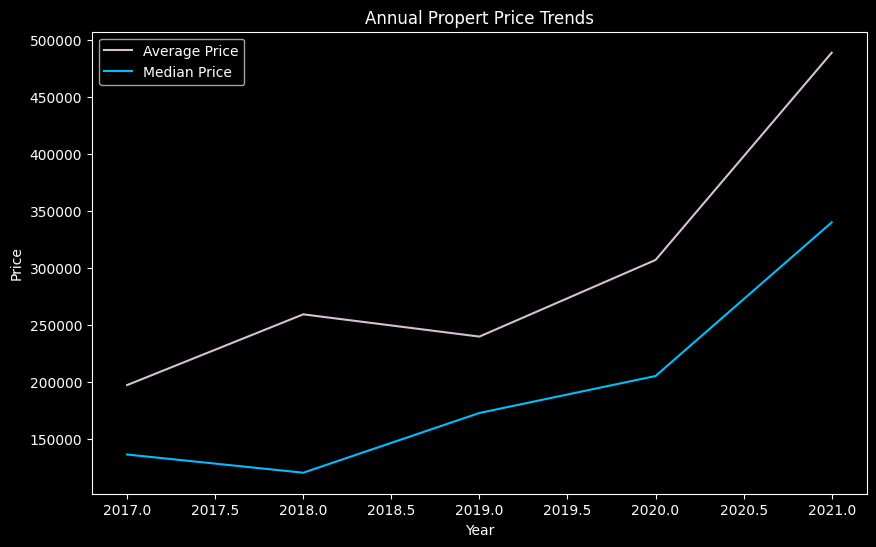

In [22]:
plt.figure(figsize=(10,6))
plt.plot(annual_average_price.index, annual_average_price.values, label="Average Price", color="thistle")
plt.plot(annual_median_price.index, annual_median_price.values, label= "Median Price",color="deepskyblue")
plt.ylabel("Price")
plt.xlabel("Year")
plt.title("Annual Propert Price Trends")
plt.legend()
plt.show()

<h1>Finding Correlation Between Property Type  Price</h1>
<h1>یافتن همبستگی بین قیمت نوع ملک
</h1>

In [23]:
annual_mean_price = data.groupby(["Year", "Residential Type", "Property Type"])["Sale Amount"].mean().reset_index()

In [24]:
pivot_table = annual_mean_price.pivot_table(values="Sale Amount", index="Year", columns=["Residential Type", "Property Type"])  

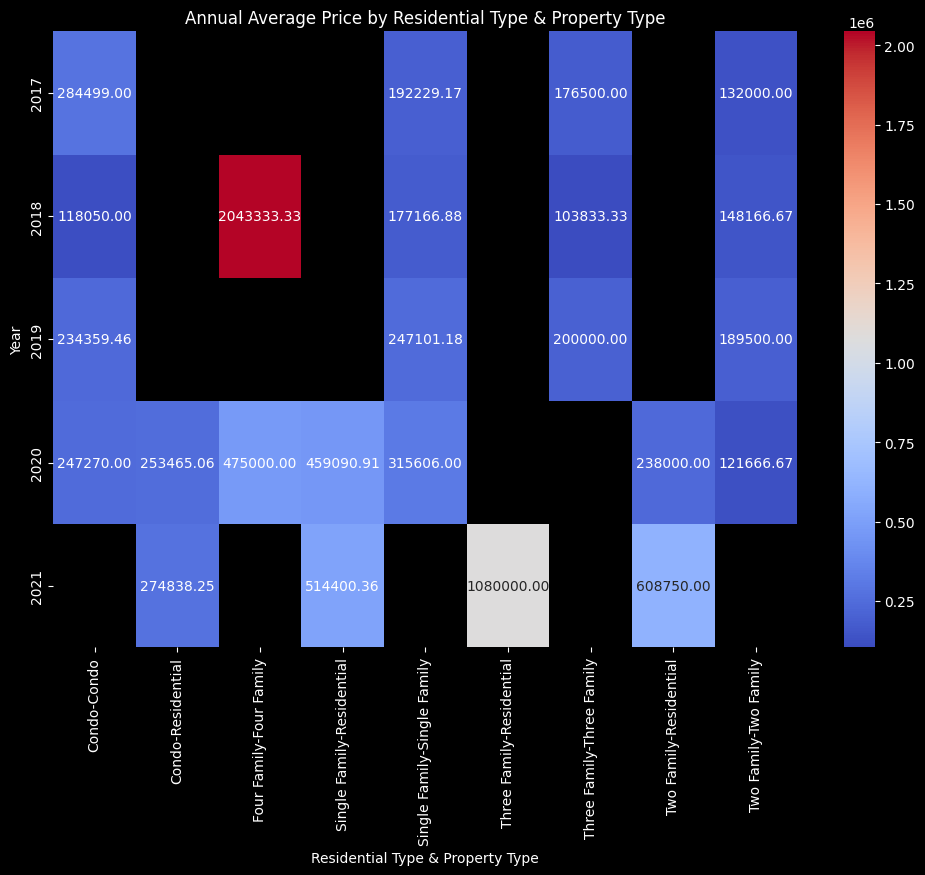

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table,cmap="coolwarm",annot=True, fmt=".2f", cbar=True)
plt.xlabel("Residential Type & Property Type")
plt.ylabel("Year")
plt.title("Annual Average Price by Residential Type & Property Type")
plt.show()

<h1>Analysing Real Estate Market Trend  Finding Investment Opportunities</h1>
<h1>تحلیل روند بازار ملکی و یافتن فرصت‌های سرمایه‌گذاری</h1>

In [26]:
annual_mean_sales_ratio = data.groupby("Year")["Sales Ratio"].mean()

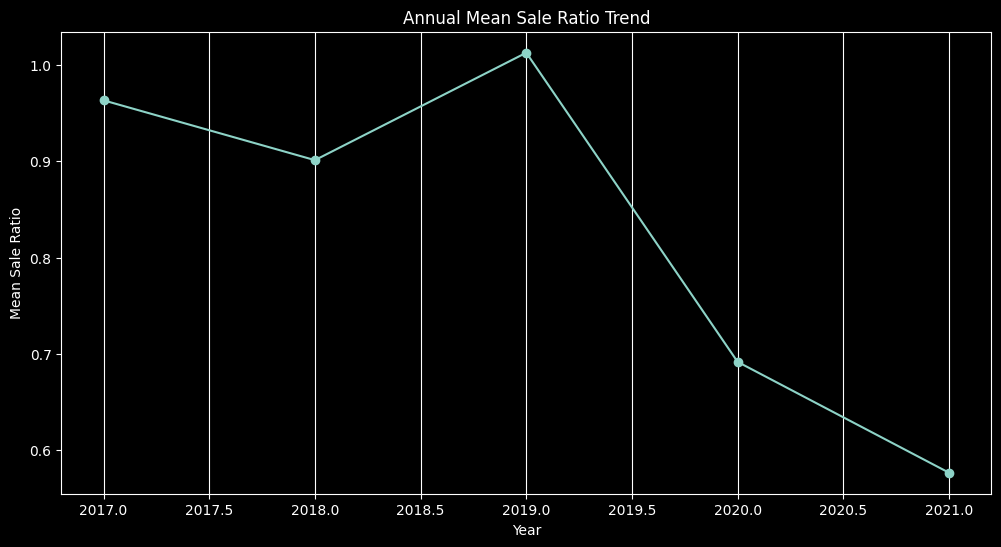

In [27]:
plt.figure(figsize=(12,6))
plt.plot(annual_mean_sales_ratio.index,annual_mean_sales_ratio,marker='o',linestyle='-')
plt.xlabel("Year")
plt.ylabel("Mean Sale Ratio")
plt.title("Annual Mean Sale Ratio Trend")
plt.grid(True, axis="x")
plt.show()

In [28]:
threshold_ratio = 0.8
low_ratio_properties = data[data["Sales Ratio"]<threshold_ratio]

print("Potential Investment Opportunities:")
print(low_ratio_properties[["Address","Sale Amount","Assessed Value","Sales Ratio"]])

Potential Investment Opportunities:
                   Address  Sale Amount  Assessed Value  Sales Ratio
1              19  MILL RD     415000.0        263600.0     0.635181
2    32 COALPIT HILL RD #4     181778.0         84900.0     0.467053
3        23 CHEPACHET ROAD     430000.0        165260.0     0.384326
4          11 BRISTOL PATH     180000.0          3770.0     0.020944
6    32 COALPIT HILL RD #6     181778.0         84900.0     0.467053
..                     ...          ...             ...          ...
248          128 MARTIN RD     255000.0        115080.0     0.451300
250           5108 MAIN ST     362000.0        169890.0     0.469309
252        36 DARTMOUTH LA     320000.0        169200.0     0.528800
257       23 WALTON STREET     520000.0        151600.0     0.291538
260          129 CAYUGA DR     157000.0         68200.0     0.434400

[150 rows x 4 columns]


In [29]:
data = pd.read_csv("Cleaned_Dataset.csv", low_memory=False)

In [30]:
data.set_index("Date Recorded", inplace=True)

In [31]:
def pre_data(data, look_back=5):
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data= scaler.fit_transform(data[["Sale Amount"]].values)
    
    X, y = [],[]
    for i in range(len(scaled_data)-look_back):
       X.append(scaled_data[i:i + look_back])
       y.append(scaled_data[i + look_back])
    return np.array(X), np.array(y), scaler

In [32]:
sequence_len = 28
input_len = 28
hidden_size = 128
num_layers = 2
num_classes = 10
num_epoch = 5
learning_rate =0.01

In [33]:
class LSTM(nn.Module):
    def __init__(self, input_len, hidden_size, num_layers):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_len, hidden_size, num_layers, batch_first=True)
        self.output_layer = nn.Linear(hidden_size, 1)
    def forward(self, X):
        h0 = torch.zeros(self.num_layers, X.size(0), self.hidden_size,dtype=torch.float32)
        c0 = torch.zeros(self.num_layers, X.size(0), self.hidden_size, dtype=torch.float32)
        out, _ = self.lstm(X, (h0, c0))
        out = self.output_layer(out[:, -1, :])
        return out

In [34]:
def train_Model(model, X_train,y_train,epochs=15, lr=0.01):
    criterion= nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters() , lr=lr)
    
    for epoch in range(epochs):
        model.train()
        inputs = torch.FloatTensor(X_train)
        targets = torch.FloatTensor(y_train)
        
        optimizer.zero_grad()
        output =model(inputs)
        loss =criterion(output, targets)
        loss.backward()
        optimizer.step()
        
        if(epoch+1)%10==0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

In [35]:
look_back = 5
X,y,scaler =pre_data(data=data, look_back=look_back)

In [36]:
X_train = X[:80]  
y_train = y[:80]
X_test = X[80:]   
y_test = y[80:]

In [37]:
model = LSTM(input_len=1,hidden_size=50,num_layers=1)

In [38]:
train_Model(model=model,X_train=X_train,y_train=y_train, epochs=100)

Epoch 10/100, Loss: 0.0127
Epoch 20/100, Loss: 0.0129
Epoch 30/100, Loss: 0.0127
Epoch 40/100, Loss: 0.0127
Epoch 50/100, Loss: 0.0127
Epoch 60/100, Loss: 0.0126
Epoch 70/100, Loss: 0.0126
Epoch 80/100, Loss: 0.0126
Epoch 90/100, Loss: 0.0126
Epoch 100/100, Loss: 0.0126
